<a href="https://colab.research.google.com/github/caffein1371/Carrier-Owl/blob/master/kadai1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mid career assignment(CV+Classification)**

**1-1 実装**

# EDA

In [1]:
#ライブラリ
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/interview/ABEJA/dataset_interview.csv')
print(df)

                 0           1           2           3           4  label
0       122.254980 -316.232650  -51.128054 -556.887773  -49.236176      5
1       -58.995946  393.699146 -161.999853  529.245672 -313.172495      4
2      -796.965065 -607.421427  295.521428  109.111587   25.661300      1
3       185.968028  223.865456  595.139067   17.734789  339.045266      2
4      -730.487099 -162.005114 -237.058238   85.692674 -149.535557      1
...            ...         ...         ...         ...         ...    ...
48092  -954.913620 -737.551437  315.819535  165.828342 -122.813472      1
48093   305.693698 -549.646460  -22.321575  277.929574  848.717256      2
48094  -271.507038  590.077819  341.365142 -435.008248  673.659307      4
48095  -310.224940 -116.728300  635.728681 -282.528062 -155.236960      5
48096  1058.862304  -83.393057  731.337374  791.045793  177.700694      6

[48097 rows x 6 columns]


**EDA**

データの大きさ(48097 rows x 6 columns)
とデータの形式（ラベルと5つの特徴量とIDで構成）ということは理解したので、pandasの関数を使い、データの情報を得る

In [ ]:
#欠損値の確認　データのtypeの確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48097 entries, 0 to 48096
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       48097 non-null  float64
 1   1       48097 non-null  float64
 2   2       48097 non-null  float64
 3   3       48097 non-null  float64
 4   4       48097 non-null  float64
 5   label   48097 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 2.2 MB


欠損値はなし　ラベル以外はfloat型

In [ ]:
#データの統計量を出力
df.describe()

0             1             2             3             4  \
count  48097.000000  48097.000000  48097.000000  48097.000000  48097.000000   
mean     -74.012773    -49.163586     66.113457     79.751523     42.148486   
std      544.931452    460.369733    429.074760    437.723799    394.669667   
min    -1081.144794  -1428.858379  -1361.445386  -1525.175643  -1297.710607   
25%     -458.784954   -375.316510   -209.560841   -208.759536   -243.155355   
50%      -83.254371   -125.037157     81.086057    100.669006     38.109662   
75%      278.738695    256.862083    361.009433    352.765136    310.843765   
max     2362.403606   1357.262954   1476.090518   1584.536666   1388.643195   

              label  
count  48097.000000  
mean       4.265464  
std        2.497215  
min        0.000000  
25%        2.000000  
50%        4.000000  
75%        6.000000  
max        8.000000

他の特徴量と比べて特徴量0だけ標準偏差が少し大きく、散らばっている．ハズレ値の処理が必要かもしれないと考察する

In [ ]:
#正解ラベルに偏りが無いかを確かめる
df["label"].value_counts()

label
1    7877
2    6990
6    6876
8    6825
4    6824
5    6313
7    3646
0    1726
3    1020
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='Count'>

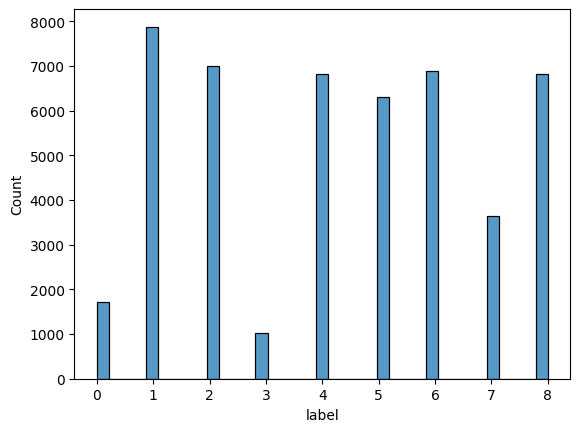

In [ ]:
sns.histplot(df["label"])

この問題は0-8からラベルが振られた9クラスの分類問題だということがわかった．またラベル０、ラベル３が極端に少ないことが見てわかる．モデルをつくる上でこの偏りが一つの課題となることがわかった


In [ ]:
#特徴量ごとの散布図を作成．ラベルによって色を変える
sns.pairplot(df, hue="label")

それぞれのラベルに対して特徴量が混在して散布しており、単純な線形モデルで分離することは難しいと考察する

<Axes: >

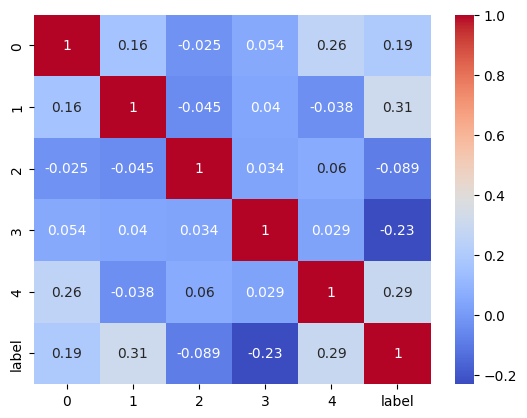

In [ ]:
#相関係数
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

それぞれの特徴量とラベルの相関係数の絶対値は低く（一番高い相関係数でも0.31→非常に弱い相関である）、先ほどの散布図でも記述したが、単純な線形分布でモデルを表現するのは困難であると考える（ex単回帰モデル）

In [ ]:
#箱ひげ図をプロット
sns.boxplot(data=df.iloc[:, :-1])

<Axes: >

箱ひげ図を見ると、ハズレ値があることがわかる．実際に四分位範囲を計算し、ハズレ値をDataframeから取り除く処理を行う

In [3]:
# Q1（25%の値）とQ3（75%の値）を計算
Q1 = df.iloc[:, :-1].quantile(0.25)
Q3 = df.iloc[:, :-1].quantile(0.75)
IQR = Q3-Q1  # IQR(四分位範囲)を計算

# 外れ値の閾値
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

In [4]:
# 条件に合う行を削除
df_cleaned = df[~((df.iloc[:, :-1] < lower_bound) | (df.iloc[:, :-1] > upper_bound)).any(axis=1)]

# 結果の確認
print(f"元のデータ数: {len(df)}")
print(f"外れ値除去後のデータ数: {len(df_cleaned)}")

元のデータ数: 48097
外れ値除去後のデータ数: 46770


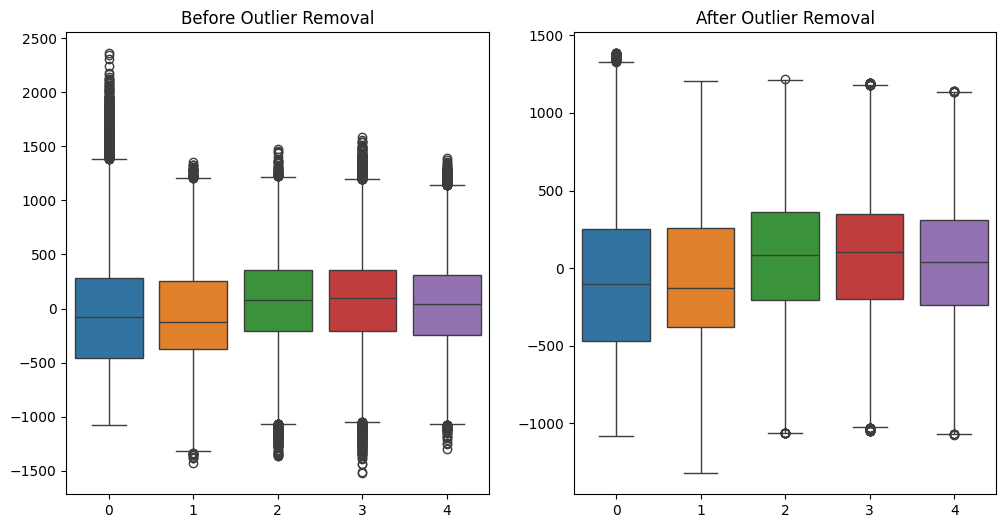

In [5]:
plt.figure(figsize=(12, 6))

# 除去前
plt.subplot(1, 2, 1)
sns.boxplot(data=df.iloc[:, :-1])
plt.title("Before Outlier Removal")

# 除去後
plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned.iloc[:, :-1])
plt.title("After Outlier Removal")

plt.show()

約2000のデータがハズレ値として除去された．除去されたデータについてもう一度見ていく．
以下、外れ値を削除した後も同様の分析を行い、元のデータに大きな影響が与えていないかを確認する

<Axes: xlabel='label', ylabel='Count'>

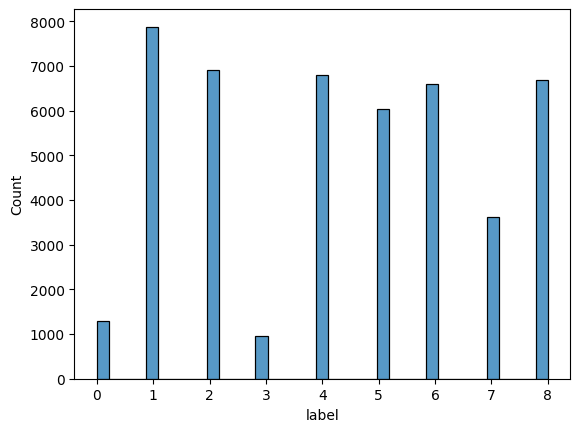

In [ ]:
sns.histplot(df_cleaned["label"])

In [ ]:
#特徴量ごとの散布図を作成．ラベルによって色を変える
sns.pairplot(df_cleaned, hue="label")

<Axes: >

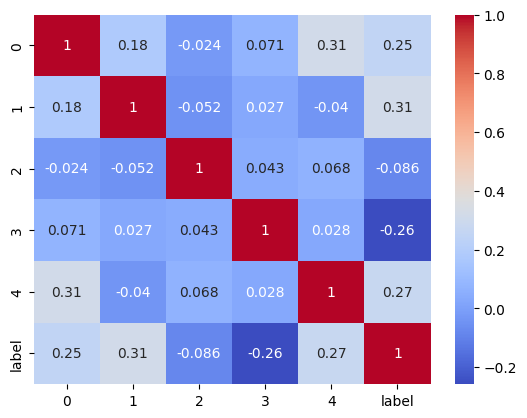

In [ ]:
#相関係数
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm")

上記のデータを用いてモデル作成を行う．それぞれの特徴量の相関は少ないので、それぞれのパラメータに重みを加えた非線形モデルを作成するのが良いと考える

# モデル作成&評価

方針：今回のタスクは9分類モデルとなっている．まずはニューラルネットワークの作成を行う．
作成するニューラルネットワークは（入力層→隠れ層→出力層）の単純なもので行う．正解ラベルのデータセットの量を補うためにSMOTEを用いてオーバーサンプリングを行い、不均衡を無くす方針でいく

In [45]:
#ライブラリ
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

**評価指標について**
今回の9分類タスクでは、評価データ数の不均衡を配慮して、Accuracyに加えてF1スコア,AUCを用いて評価を行う

In [ ]:
def evaluate_model(model, X_val, y_val):
    model.eval()  # 評価モードに切り替え
    with torch.no_grad():
        # 入力データをモデルに通す
        y_pred = model(X_val)

        # 最大確率のクラスを予測として取得
        y_pred_class = torch.argmax(y_pred, dim=1)

        # F1スコア（マクロ平均）
        f1 = f1_score(y_val, y_pred_class, average='macro')

        # AUC (One-vs-Rest方式)
        y_val_onehot = nn.functional.one_hot(y_val, num_classes=y_pred.size(1))  # One-hot encoding
        auc = roc_auc_score(y_val_onehot, torch.softmax(y_pred, dim=1), multi_class='ovr', average='macro')

        # 精度（Accuracy）
        accuracy = accuracy_score(y_val, y_pred_class)

    return accuracy, f1, auc

以下が学習タスクの実装である

In [7]:
# 特徴量とラベル
X = df_cleaned.iloc[:, :-1].values  # 特徴量
y = df_cleaned.iloc[:, -1].values   # ラベル

箱ひげ図より全ての特徴量が同じスケールの範囲内で分布しているわけでは無いため、データを平均0,標準偏差1の値で標準化する．


In [8]:
# データの標準化
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
# 訓練データとテストデータに分割 (80%: 訓練, 20%: テスト)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

オーバーサンプリングを行う

In [10]:
# クラス不均衡への対応を行う
print("Before SMOTE:", Counter(y_train))  # SMOTE適用前のクラス分布

# SMOTEで少数クラスを増やす
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("After SMOTE:", Counter(y_train_resampled))  # SMOTE適用後のクラス分布

Before SMOTE: Counter({1: 6302, 2: 5533, 4: 5430, 8: 5353, 6: 5270, 5: 4829, 7: 2891, 0: 1039, 3: 769})
After SMOTE: Counter({7: 6302, 5: 6302, 1: 6302, 6: 6302, 0: 6302, 4: 6302, 2: 6302, 8: 6302, 3: 6302})


In [11]:
# PyTorchのTensorに変換
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [12]:
# ニューラルネットワークの定義
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x  # ソフトマックスは損失関数で処理する

In [13]:
# モデル作成
input_size = X.shape[1]  # 特徴量の数
hidden_size = 32  # 隠れ層のユニット数
output_size = len(np.unique(y))  # 9クラス分類

model = SimpleNN(input_size, hidden_size, output_size)

# 損失関数と最適化手法
criterion = nn.CrossEntropyLoss()  # ソフトマックス + NLLLoss
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 学習ループ
num_epochs = 100
batch_size = 32

In [ ]:
for epoch in range(num_epochs):
    # 順伝播
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # 逆伝播と最適化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        # バリデーションデータで評価
        accuracy, f1, auc = evaluate_model(model, X_test_tensor, y_test_tensor)

        # 結果を表示
        print(f"Epoch {epoch+1}/{num_epochs} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, AUC: {auc:.4f}")

Epoch 10/100 - Accuracy: 0.5537, F1 Score: 0.5103, AUC: 0.9302
Epoch 20/100 - Accuracy: 0.6039, F1 Score: 0.5588, AUC: 0.9447
Epoch 30/100 - Accuracy: 0.6718, F1 Score: 0.6327, AUC: 0.9524
Epoch 40/100 - Accuracy: 0.6946, F1 Score: 0.6572, AUC: 0.9561
Epoch 50/100 - Accuracy: 0.7173, F1 Score: 0.6790, AUC: 0.9600
Epoch 60/100 - Accuracy: 0.7337, F1 Score: 0.6944, AUC: 0.9629
Epoch 70/100 - Accuracy: 0.7448, F1 Score: 0.7043, AUC: 0.9650
Epoch 80/100 - Accuracy: 0.7524, F1 Score: 0.7120, AUC: 0.9665
Epoch 90/100 - Accuracy: 0.7567, F1 Score: 0.7166, AUC: 0.9676
Epoch 100/100 - Accuracy: 0.7594, F1 Score: 0.7204, AUC: 0.9684


In [ ]:
# モデル評価
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_classes = torch.argmax(y_pred, dim=1)
    accuracy = (y_pred_classes == y_test_tensor).sum().item() / len(y_test_tensor)
    print(f"Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, AUC: {auc:.4f}")

Accuracy: 0.7594, F1 Score: 0.7204, AUC: 0.9684


上記よりAccuracy: 0.7594, F1 Score: 0.7204, AUC: 0.9684という精度が得られた。


In [49]:
#ラベルに名前をつけておく
label_names = []
for i in range(0,9):
  label_names.append(str(i))

In [ ]:
print(classification_report(y_test, y_pred_classes,target_names=label_names))

              precision    recall  f1-score   support

           0       0.61      0.90      0.72       260
           1       0.94      0.94      0.94      1575
           2       0.72      0.66      0.69      1383
           3       0.27      0.63      0.38       193
           4       0.85      0.85      0.85      1357
           5       0.82      0.67      0.74      1207
           6       0.66      0.68      0.67      1318
           7       0.73      0.83      0.78       723
           8       0.79      0.68      0.73      1338

    accuracy                           0.76      9354
   macro avg       0.71      0.76      0.72      9354
weighted avg       0.78      0.76      0.76      9354



ラベル3に対する判定がダントツで悪いことがわかる。precisionが低いので3と判定したもののうち、実際に3であるものが少ないということである。3の母数が少ないために、3のデータが来た時に他のラベルで判定した方が、正解する確率が高くなるため、このような学習結果になると考察できる

[[ 234    0    0    1    0   14    4    0    7]
 [   0 1476    8    6    0    6   33   20   26]
 [  43   11  912   29   37   21  284    4   42]
 [   2    2   10  121    2   27    2    0   27]
 [   2    8    5    2 1151    2   59  115   13]
 [  55   15   17  149   16  810   28   54   63]
 [  22   30  269    7   37   17  894    1   41]
 [   6   11    2    0   79    8    3  599   15]
 [  22   25   46  137   34   86   54   28  906]]


<Axes: >

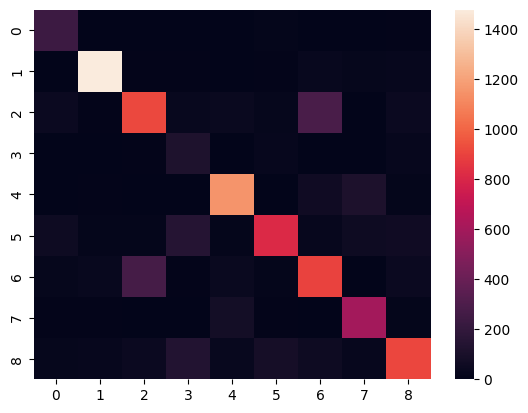

In [ ]:
cm = confusion_matrix(y_test, y_pred_classes)
print(cm)
sns.heatmap(cm)

縦軸が真の結果、横軸が判定結果である。混合行列を見ると、２を６と判定しているもの、６を２を判定しているものが多いことがわかった。実際に２と６のデータの分布を見てみる。

In [ ]:
# 正解ラベルが 2 または 6 のデータを抽出
filtered_df = df_cleaned[df_cleaned['label'].isin([2, 6])]
sns.pairplot(filtered_df, hue="label")

散布図を確認すると、２とラベルが振られたデータは全ての特徴量に対して、幅広く分布しており、他のラベルが振られたデータと混在して、分類が難しい問題になっていることがわかった。精度を上げるためにはより複雑な非線形モデルが必要だと考える。

 精度を上げるためにできそうな事を以下に記す

*   ニューラルネットワークの層を増やす
*   データセット全体の量を増やす（特に０や３のような少数データを増やし不均衡を減らす）
*   アンダーサンプリングを試してみる
*  学習の際に、少ないデータに重みが増すように学習させる



また学習の精度を高めることとは別に汎化性能高めるために以下の手段が考えられる

*   データオーギュメンテーションを活用する
*   クロスバリデーションによる学習と評価

# 1-2 他モデルの検討

LightGBMと深層学習を用いたモデル作成を行う。

採用した理由：今回のケースの場合は特徴量の数は5個と比較的少なく、特徴量の重みの過学習を配慮するため、まずはLoghtGBMを用いる。またLoghtGBMは比較的速く学習が終わるため、ベンチマークとすることできる。使える資源や時間を加味した上で、最初に作成するモデル作成としてはまずはLightGBMを使うことを考えた。このモデルでの学習結果を加味して、計算リソースや時間がかかる、深層学習を行う

In [83]:
#ライブラリ
import lightgbm as lgb
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import f1_score

ニューラルネットワークで使ったデータを再利用する

In [ ]:
# # 特徴量とラベル
# X = df_cleaned.iloc[:, :-1].values  # 特徴量
# y = df_cleaned.iloc[:, -1].values   # ラベル

In [ ]:
# # 訓練データとテストデータに分割 (80%: 訓練, 20%: テスト)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# # クラス不均衡への対応を行う
# print("Before SMOTE:", Counter(y_train))  # SMOTE適用前のクラス分布

# # SMOTEで少数クラスを増やす
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# print("After SMOTE:", Counter(y_train_resampled))  # SMOTE適用後のクラス分布

Before SMOTE: Counter({1: 6302, 2: 5533, 4: 5430, 8: 5353, 6: 5270, 5: 4829, 7: 2891, 0: 1039, 3: 769})
After SMOTE: Counter({7: 6302, 5: 6302, 1: 6302, 6: 6302, 0: 6302, 4: 6302, 2: 6302, 8: 6302, 3: 6302})


In [84]:
# データセットを生成する
lgb_train = lgb.Dataset(X_train_resampled, label=y_train_resampled)
lgb_valid = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

In [85]:
# LightGBM のハイパーパラメータ
lgb_params = {
    # 多クラス分類問題
    'objective': 'multiclass',
    # クラスの数
    'num_class': 9,
    # 損失関数の最小化を目指す
    'metric': 'multi_logloss',
    # Fatal の場合出力
    'verbosity': -1,
    # 乱数シード
    'seed': 42,
    # 学習率
    'learning_rate': 0.02,
}

In [86]:
# 上記のパラメータでモデルを学習する
lgb_model = lgb.train(lgb_params, lgb_train, valid_sets=[lgb_valid],
                  num_boost_round=100,  # 最大イテレーション回数指定
                 )

In [87]:
# テストデータでの予測
y_pred = lgb_model.predict(X_test)
pred = np.argmax(y_pred,axis = 1)


# 精度の評価
accuracy = accuracy_score(pred,y_test)
print('Accuracy:', accuracy)

Accuracy: 0.7891810989950823


In [88]:
print(classification_report(y_test, pred,target_names=label_names))

              precision    recall  f1-score   support

           0       0.65      0.88      0.75       260
           1       0.95      0.95      0.95      1575
           2       0.77      0.64      0.70      1383
           3       0.32      0.58      0.41       193
           4       0.85      0.86      0.86      1357
           5       0.82      0.73      0.77      1207
           6       0.69      0.76      0.72      1318
           7       0.78      0.82      0.80       723
           8       0.79      0.75      0.77      1338

    accuracy                           0.79      9354
   macro avg       0.74      0.78      0.75      9354
weighted avg       0.80      0.79      0.79      9354



上記の結果よりF1 score(macro)は0.75

各ラベルに対しての評価値を見てみるとラベル3に対する結果が悪い、ニューラルネットワークで学習させた時と同じような結果が得られた。しかし、同じようにデータ数が低いラベル0よりも大きく結果が悪いので、この2つのラベルに関わるデータを見てみることは精度の向上に繋がるかもしれない。

In [ ]:
cm = confusion_matrix(y_test, pred)
print(cm)
sns.heatmap(cm)

[[ 230    0    2    2    3   12    3    0    8]
 [   0 1501    9    6    1    9   21   13   15]
 [  34    9  889   31   29   26  307    1   57]
 [   2    2   13  112    1   29    2    1   31]
 [   1    5    9    3 1171    6   54   90   18]
 [  38    6   23  108   15  881   22   41   73]
 [  20   14  176    9   28   21 1007    1   42]
 [   1   10    2    1   84   15    4  590   16]
 [  26   25   32   79   40   74   44   17 1001]]


<Axes: >

2を6と判定してしまうもの、6を2と判定してしまうものが多いという結果が得られた。

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

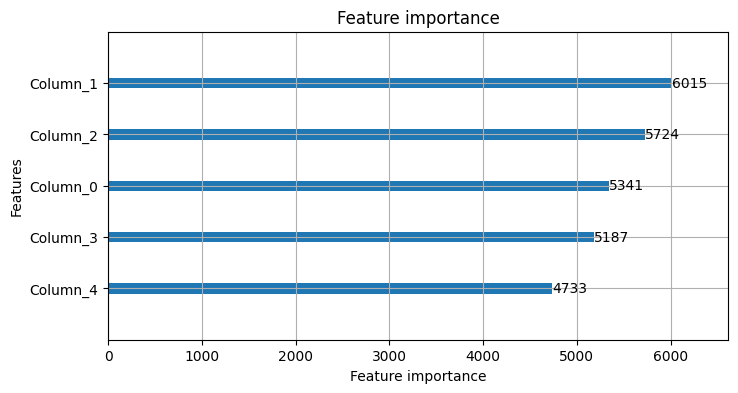

In [91]:
lgb.plot_importance(lgb_model, figsize=(8,4), max_num_features=5, importance_type='split')

どの特徴量が分類に寄与したかをplotした。決定木の生成に寄与したかが上記のグラフからわかる。特徴量1が一番木の生成に貢献していることがわかる。

In [ ]:
auc_m1 = roc_auc_score(y_test, y_pred, multi_class="ovr")
print('AUC:',auc_m1)

AUC: 0.9713302073377612


上記よりAccuracy: 0.7892, F1 Score: 0.75, AUC: 0.9713という精度が得られた。
ニューラルネットワークより若干良い結果が得られた。

# 多層ニューラルネットワーク

しかし、データの不均衡及び2と6の誤認識の問題は解決しなかった。そのため、次の手段を用いてモデルを作成する。

*   多層ニューラルネットワーク
*   データの多さに応じて重みを課す

In [38]:
#ライブラリ
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
import torch

In [17]:
def evaluate_model_gpu(model, X_val, y_val):
    model.eval()  # 評価モードに切り替え
    with torch.no_grad():
        # 入力データをモデルに通す
        inputs,targets=X_val.to(device), y_val.to(device)
        y_pred = model(inputs)


        # 最大確率のクラスを予測として取得
        y_pred_class = torch.argmax(y_pred, dim=1)

        #cpuへ数値を移動
        y_val = y_val.cpu()
        y_pred_class = y_pred_class.cpu().numpy()
        y_pred = y_pred.cpu()

        # F1スコア（マクロ平均）
        f1 = f1_score(y_val, y_pred_class, average='macro')

        # AUC (One-vs-Rest方式)
        y_val_onehot = nn.functional.one_hot(y_val, num_classes=y_pred.size(1))  # One-hot encoding
        auc = roc_auc_score(y_val_onehot.cpu(), torch.softmax(y_pred, dim=1), multi_class='ovr', average='macro')

        # 精度（Accuracy）
        accuracy = accuracy_score(y_val, y_pred_class)

    return accuracy, f1, auc

In [18]:
#データセットの準備
class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = torch.tensor(data, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

In [19]:
class MultiLayerNN(nn.Module):
    def __init__(self, input_dim,output_size):
        super(MultiLayerNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, output_size)
        #self.relu = nn.ReLU()
        self.relu = nn.LeakyReLU(0.01) # LeakyReLU
        self.dropout = nn.Dropout(p=0.1)


    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.relu(self.fc4(x))

        return x # ソフトマックスは損失関数で処理する

# # ニューラルネットワークの定義
# class SimpleNN(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(SimpleNN, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)
#         self.relu = nn.ReLU()
#         self.fc2 = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         x = self.fc1(x)
#         x = self.relu(x)
#         x = self.fc2(x)
#         return x  # ソフトマックスは損失関数で処理する

In [30]:
# モデルの定義
class MultiLayerNN2(nn.Module):
    def __init__(self, input_dim,output_size):
        super(MultiLayerNN2, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.bn1 = nn.BatchNorm1d(256)  # Batch Normalization
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(64, 32)
        self.bn4 = nn.BatchNorm1d(32)
        self.fc5 = nn.Linear(32, output_size)
        #self.relu = nn.LeakyReLU(negative_slope=0.01)
        self.relu = nn.SiLU()
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.relu(self.bn3(self.fc3(x)))
        x = self.relu(self.bn4(self.fc4(x)))
        x = self.dropout(x)
        x = self.relu(self.fc5(x))
        return x

In [94]:
class MultiLayerNN3(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(MultiLayerNN3, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.bn1 = nn.BatchNorm1d(hidden_sizes[0])

        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.bn2 = nn.BatchNorm1d(hidden_sizes[1])
        self.dropout2 = nn.Dropout(p=0.2)  #中間層で適用

        self.fc3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])
        self.bn3 = nn.BatchNorm1d(hidden_sizes[2])
        self.dropout3 = nn.Dropout(p=0.2)  #中間層で適用

        self.fc4 = nn.Linear(hidden_sizes[2], hidden_sizes[3])
        self.bn4 = nn.BatchNorm1d(hidden_sizes[3])
        self.dropout4 = nn.Dropout(p=0.1)  #出力層直前で適用

        self.fc5 = nn.Linear(hidden_sizes[3], output_size)
        self.relu = nn.SiLU()

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))   #Dropoutなし
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)                   #中間層で適用
        x = self.relu(self.bn3(self.fc3(x)))
        x = self.dropout3(x)                   #中間層で適用
        x = self.relu(self.bn4(self.fc4(x)))
        x = self.dropout4(x)                   #出力層直前で適用
        x = self.fc5(x)
        return x

In [111]:
#Focal Loss　難しいクラス分類に対して重みを課す
class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        #クロスエントロピー損失を計算
        ce_loss = nn.CrossEntropyLoss(weight=self.alpha, reduction='none')(inputs, targets)
        pt = torch.exp(-ce_loss) #正解ラベルに対する確率

        #Focal Loss の計算 (1 - pt) を gamma 乗
        focal_loss = (1 - pt) ** self.gamma * ce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

In [112]:
dataset = CustomDataset(X_train_resampled, y_train_resampled)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

In [113]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

#クラス重みの計算
class_counts = Counter(y_train)
class_weights = [1.0 / np.sqrt(class_counts[i]) for i in sorted(class_counts.keys())]  #平方根でスムージング
class_weights = np.array(class_weights)
class_weights /= np.sum(class_weights) #正規化
weights_tensor = torch.tensor(class_weights, dtype=torch.float32).to(device)

#モデル定義
hidden_sizes = [256, 256, 128, 64] #過学習防止のために段階的に縮小

ML_model = MultiLayerNN3(input_size,hidden_sizes,output_size)

# === Focal Loss にクラス重みを適用 ===
criterion = FocalLoss(alpha=weights_tensor, gamma=1.5)

optimizer = optim.AdamW(ML_model.parameters(), lr=0.0005, weight_decay=5e-4)

# CosineAnnealingWarmRestarts スケジューラ
scheduler = CosineAnnealingWarmRestarts(
    optimizer,
    T_0=20,          # サイクルを伸ばす
    T_mult=2,
    eta_min=1e-6
)

# **学習ループ**
num_epochs = 1000

ML_model.to(device)


MultiLayerNN3(
  (fc1): Linear(in_features=5, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout3): Dropout(p=0.2, inplace=False)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (bn4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout4): Dropout(p=0.1, inplace=False)
  (fc5): Linear(in_features=64, out_features=9, bias=True)
  (relu): LeakyReLU(negative_slope=0.01)
)

In [114]:

for epoch in range(num_epochs):
    ML_model.train()
    epoch_loss = 0.0

    for inputs, targets in dataloader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = ML_model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    if (epoch + 1) % 100 == 0:
          print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f}")

    scheduler.step()


Epoch 100/1000 - Loss: 2.2404
Epoch 200/1000 - Loss: 2.1344
Epoch 300/1000 - Loss: 1.8839
Epoch 400/1000 - Loss: 1.9753
Epoch 500/1000 - Loss: 1.7845
Epoch 600/1000 - Loss: 1.7204
Epoch 700/1000 - Loss: 1.9075
Epoch 800/1000 - Loss: 1.8371
Epoch 900/1000 - Loss: 1.7998
Epoch 1000/1000 - Loss: 1.6504


In [115]:
 torch.save(ML_model.state_dict(), 'model_weights.pth')

In [116]:
# モデル評価
ML_model.eval()
with torch.no_grad():
    inputs,targets=X_test_tensor.to(device), y_test_tensor.to(device)
    prediction = ML_model(inputs)
    y_pred_classes = torch.argmax(prediction, dim=1).cpu()
    accuracy, f1, auc = evaluate_model_gpu(ML_model,X_test_tensor ,y_test_tensor)
    #cpuへ数値を移動
    y_val = y_test_tensor.cpu()
    y_pred_class = prediction.cpu().numpy()
    prediction = prediction.cpu()
    # 結果を表示
    print(f" Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, AUC: {auc:.4f}")

 Accuracy: 0.7400, F1 Score: 0.6988, AUC: 0.9722


In [117]:
print(classification_report(y_val, y_pred_classes,target_names=label_names))

              precision    recall  f1-score   support

           0       0.52      0.93      0.67       260
           1       0.97      0.95      0.96      1575
           2       0.85      0.61      0.71      1383
           3       0.14      0.78      0.24       193
           4       0.89      0.81      0.85      1357
           5       0.87      0.61      0.71      1207
           6       0.70      0.82      0.75      1318
           7       0.71      0.86      0.78       723
           8       0.82      0.50      0.62      1338

    accuracy                           0.74      9354
   macro avg       0.72      0.76      0.70      9354
weighted avg       0.82      0.74      0.76      9354



クラス3の精度が低く、クラスの母数が少ないことから未だ不均衡があることがわかる。クラス2、5に関してはデータがあるにもかかわらずRecallが低いことから、モデルに工夫をする余地がある。

[[ 241    0    1    5    1    3    4    0    5]
 [   1 1500    7   23    0    5   10   20    9]
 [  41    4  842   73   28   25  324    7   39]
 [   4    1    9  150    1   13    3    0   12]
 [   9    5    8   33 1098    3   50  142    9]
 [  67    3    7  310    7  731   21   31   30]
 [  24   13  101   37   24   13 1075    6   25]
 [   2    9    2    9   53    9    4  622   13]
 [  73   17   14  425   22   43   39   42  663]]


<Axes: >

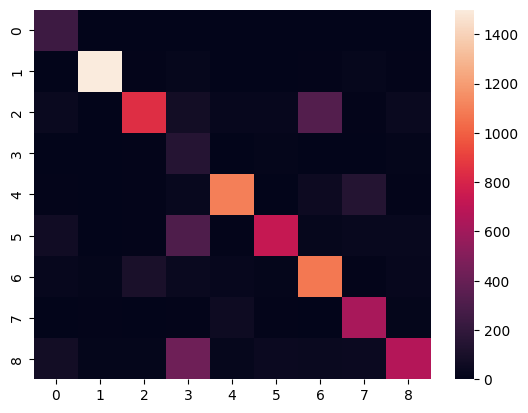

In [118]:
cm = confusion_matrix(y_val, y_pred_classes)
print(cm)
sns.heatmap(cm)

8を3に間違えているケースが多く、Recallを大きく下げている。また２を６と間違えるケースは相変わらず多いが、６を２と間違えるケースは減っている

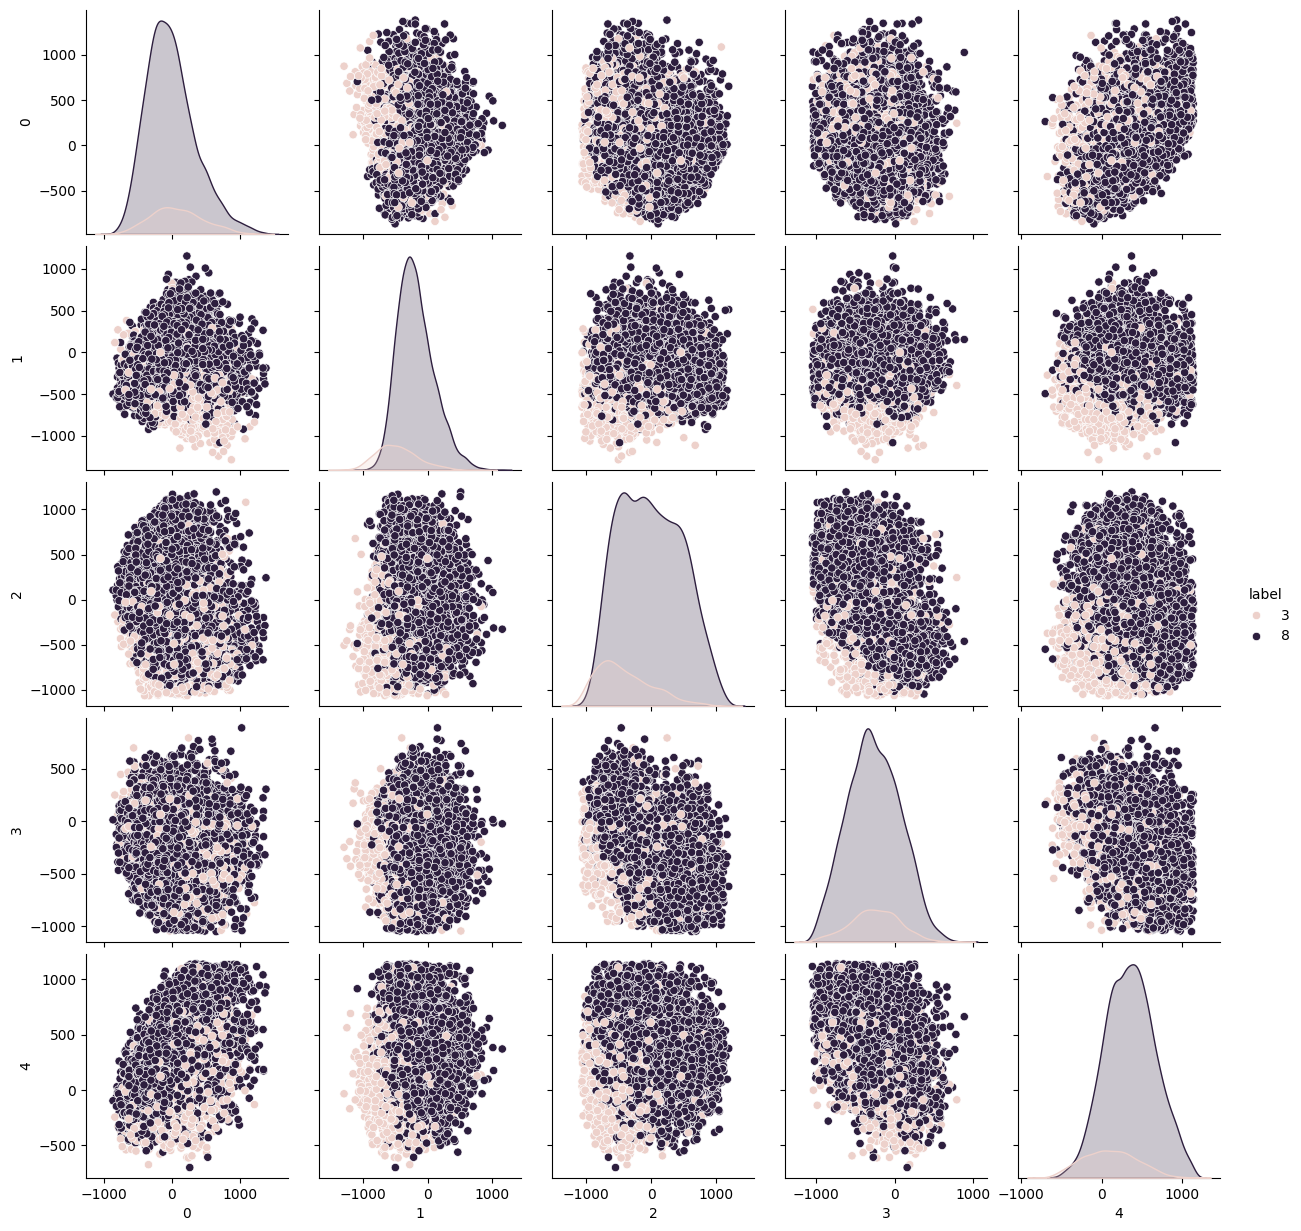

In [110]:
#正解ラベルが3または8のデータを抽出
filtered_df = df_cleaned[df_cleaned['label'].isin([3, 8])]
sns.pairplot(filtered_df, hue="label")

ラベル3と8はスケールの違いがあるが、散布図としては似た散らばりかたをしている。

多層ニューラルネットワークとしてやったことは

*   Swish活性化関数による勾配消失対策
*   データの不均衡による重みづけ
*   Focal Lossを用いた難しいサンプルへの対応
*   BatchNormlizationとDropOutによる過学習対策




# まとめ
ニューラルネットワーク：Accuracy: 0.7594, F1 Score: 0.7204, AUC: 0.9684

LightGBM：Accuracy: 0.7892, F1 Score: 0.75, AUC: 0.9713

多層ニューラルネットワーク：Accuracy: 0.7400, F1 Score: 0.6988, AUC: 0.9722


考察：
多層ニューラルネットワークの結果ではAUCが他のモデルに比べて、多少良いモデルを作成することができた。しかしAccuracyやF1値はLightGBMを超えることができなかった。このことから、今回のデータとしては決定木を用いたモデルの方が適している可能性があることが考察できる。


少数データに対する不均衡を減らすために、データ量に応じた重みをかけ、オーバーサンプリングしたが、testデータに対する評価は向上しなかった。しかし、クラス2と5に関してはデータが揃っているにもかかわらずRecallの精度が悪かった。なのモデルの性能を向上させる余地があると考えらえる。
次に試せることとしては、間違っているデータの分布の調査、LightGBMのハイパーパラメータの最適化、複数のアルゴリズム（exLightGBM+NN等）を組み合わせたアンサンブル学習が試すことができる。